In [2]:
library(dplyr)
library(parameters)
library(ggplot2)
library(tidyverse)


results <- read.csv('results_nooversampling/timm_bias_celeba_balanced_ratio_cos.csv', sep='\t')
meta <- read.csv('timm_model_metadata.csv') 


NameError: name 'library' is not defined

In [12]:
colnames(data)

[1] "Model"                     "Idx.training.ratio.male"  
 [3] "Idx.training.ratio.female" "Img.training.ratio.male"  
 [5] "Img.training.ratio.female" "Data"                     
 [7] "P.identities.male"         "P.identities.female"      
 [9] "P.images.male"             "P.images.female"          
[11] "Acc.m"                     "Acc.f"                    
[13] "Intra.m"                   "Intra.f"                  
[15] "Inter.m"                   "Inter.f"                  
[17] "Ratio.m"                   "Ratio.f"                  
[19] "seed"                      "input_size"               
[21] "interpolation"             "mean"                     
[23] "std"                       "crop_pct"                 
[25] "model_type"                "n_feature_params"         
[27] "Conv2d"                    "BatchNorm2d"              
[29] "MaxPool2d"                 "Flatten"                  
[31] "AdaptiveAvgPool2d"         "Identity"                 
[33] "feature_dim"               "test_input_size"          
[35] "SiLU"                      "ReLU"                     
[37] "Dropout2d"                 "Dropout"                  
[39] "LayerNorm"                 "Linear"                   
[41] "GELU"                      "PosEmbedRel"              
[43] "AvgPool2d"                 "Conv1d"                   
[45] "LayerNorm2d"               "LeakyReLU"                
[47] "BlurPool2d"                "ScaledStdConv2dSame"      
[49] "GammaAct"                  "Sigmoid"                  
[51] "ELU"                       "ScaledStdConv2d"          
[53] "Conv2dSame"                "ReLU6"                    
[55] "Hardsigmoid"               "Hardswish"                
[57] "Sequential"                "Upsample"                 
[59] "DropPath"                  "MaxPool2dSame"            
[61] "Conv3d"                    "BatchNorm1d"              
[63] "Subsample"                 "AvgPool2dSame"            
[65] "ZeroPad2d"                 "ModuleList"               
[67] "Affine"                    "RadixSoftmax"             
[69] "GroupNorm"                 "StdConv2d"                
[71] "ConstantPad2d"             "SelectSeq"                
[73] "Softmax"                   "AdaptiveAvgPool1d"        
[75] "CondConv2d"                "Unfold"                   
[77] "StdConv2dSame"             "disparity"                
[79] "distance"

In [3]:
data <- merge(results,meta)  %>% 
  select(-uuid) %>%
  distinct()
data$disparity <- data$Acc.f/data$Acc.m
data <- data %>%
  filter_at(vars(Acc.f), all_vars(!is.infinite(.))) %>%
  filter_at(vars(Acc.m), all_vars(!is.infinite(.)))

data$distance <- abs(data$Acc.f-data$Acc.m) 
data <- data %>%
  filter_at(vars(disparity), all_vars(!is.infinite(.))) %>%
  filter(distance > 0 ) 


In [4]:
model <- lm( log(distance) ~ test_input_size + n_feature_params - 1,
             data = data, na.action = na.omit)
summary(model)



Call:
lm(formula = log(distance) ~ test_input_size + n_feature_params - 
    1, data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8657 -0.5860  0.1115  0.7717  3.1707 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
test_input_size(3, 112, 112) -3.952e-01  1.922e-02 -20.566  < 2e-16 ***
test_input_size(3, 224, 224) -1.209e+00  3.243e-02 -37.275  < 2e-16 ***
test_input_size(3, 256, 256) -1.325e+00  1.001e-01 -13.231  < 2e-16 ***
test_input_size(3, 320, 320) -1.669e+00  3.469e-01  -4.812 1.53e-06 ***
test_input_size(3, 384, 384) -1.212e+00  7.154e-02 -16.939  < 2e-16 ***
test_input_size(3, 416, 416) -1.143e+00  3.471e-01  -3.294 0.000993 ***
test_input_size(3, 512, 512) -1.716e+00  3.495e-01  -4.909 9.40e-07 ***
n_feature_params             -1.426e-09  1.439e-10  -9.912  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.097 on 5668 degrees of freedom
Mu

In [5]:
model <- lm( log(distance) ~ model_type + n_feature_params - 1,
             data = data, na.action = na.omit)
summary(model)


Call:
lm(formula = log(distance) ~ model_type + n_feature_params - 
    1, data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4524 -0.4167  0.1800  0.5842  2.5187 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
model_typeBeit                     -1.297e+00  1.164e-01 -11.142  < 2e-16 ***
model_typeByobNet                  -1.090e+00  4.585e-02 -23.768  < 2e-16 ***
model_typeCait                     -9.187e-01  9.956e-02  -9.227  < 2e-16 ***
model_typeCoaT                     -1.440e+00  1.345e-01 -10.706  < 2e-16 ***
model_typeConViT                   -1.327e+00  1.720e-01  -7.719 1.38e-14 ***
model_typeConvMixer                -1.246e+00  1.719e-01  -7.247 4.85e-13 ***
model_typeConvNeXt                  1.102e-01  8.614e-02   1.279 0.200945    
model_typeCspNet                    3.987e-01  1.719e-01   2.320 0.020401 *  
model_typeDenseNet                 -2.247e-01  1.215e-01  -1.849 0.064567 .  
m

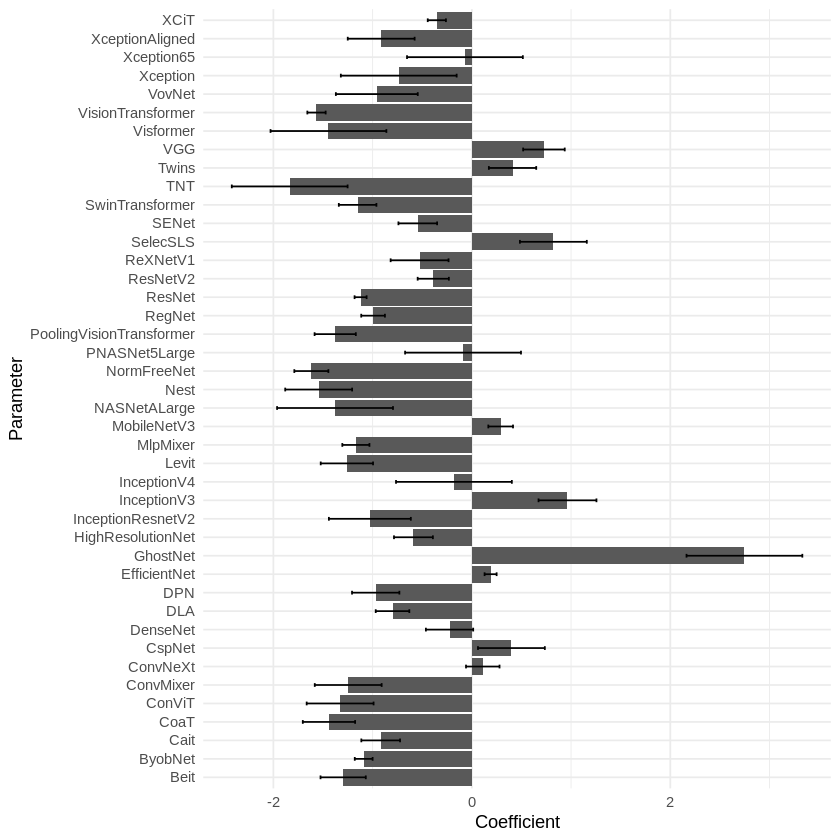

In [6]:
fig <- tibble(model_parameters(model))  %>%
  mutate(Parameter = str_replace_all(Parameter, c('model_type' = '')))


fig %>%
  filter(Parameter!='n_feature_params') %>%
  ggplot( 
    aes(x=Parameter,
        y = Coefficient,)) + 
  geom_col(position='dodge') + coord_flip() + 
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), position=position_dodge(0.9), width = 0.2) + 
  theme_minimal() 


In [22]:
colnames(data)

[1] "Model"                     "Idx.training.ratio.male"  
 [3] "Idx.training.ratio.female" "Img.training.ratio.male"  
 [5] "Img.training.ratio.female" "Data"                     
 [7] "P.identities.male"         "P.identities.female"      
 [9] "P.images.male"             "P.images.female"          
[11] "Acc.m"                     "Acc.f"                    
[13] "Intra.m"                   "Intra.f"                  
[15] "Inter.m"                   "Inter.f"                  
[17] "Ratio.m"                   "Ratio.f"                  
[19] "seed"                      "input_size"               
[21] "interpolation"             "mean"                     
[23] "std"                       "crop_pct"                 
[25] "model_type"                "n_feature_params"         
[27] "Conv2d"                    "BatchNorm2d"              
[29] "MaxPool2d"                 "Flatten"                  
[31] "AdaptiveAvgPool2d"         "Identity"                 
[33] "feature_dim"               "test_input_size"          
[35] "SiLU"                      "ReLU"                     
[37] "Dropout2d"                 "Dropout"                  
[39] "LayerNorm"                 "Linear"                   
[41] "GELU"                      "PosEmbedRel"              
[43] "AvgPool2d"                 "Conv1d"                   
[45] "LayerNorm2d"               "LeakyReLU"                
[47] "BlurPool2d"                "ScaledStdConv2dSame"      
[49] "GammaAct"                  "Sigmoid"                  
[51] "ELU"                       "ScaledStdConv2d"          
[53] "Conv2dSame"                "ReLU6"                    
[55] "Hardsigmoid"               "Hardswish"                
[57] "Sequential"                "Upsample"                 
[59] "DropPath"                  "MaxPool2dSame"            
[61] "Conv3d"                    "BatchNorm1d"              
[63] "Subsample"                 "AvgPool2dSame"            
[65] "ZeroPad2d"                 "ModuleList"               
[67] "Affine"                    "RadixSoftmax"             
[69] "GroupNorm"                 "StdConv2d"                
[71] "ConstantPad2d"             "SelectSeq"                
[73] "Softmax"                   "AdaptiveAvgPool1d"        
[75] "CondConv2d"                "Unfold"                   
[77] "StdConv2dSame"             "disparity"                
[79] "distance"

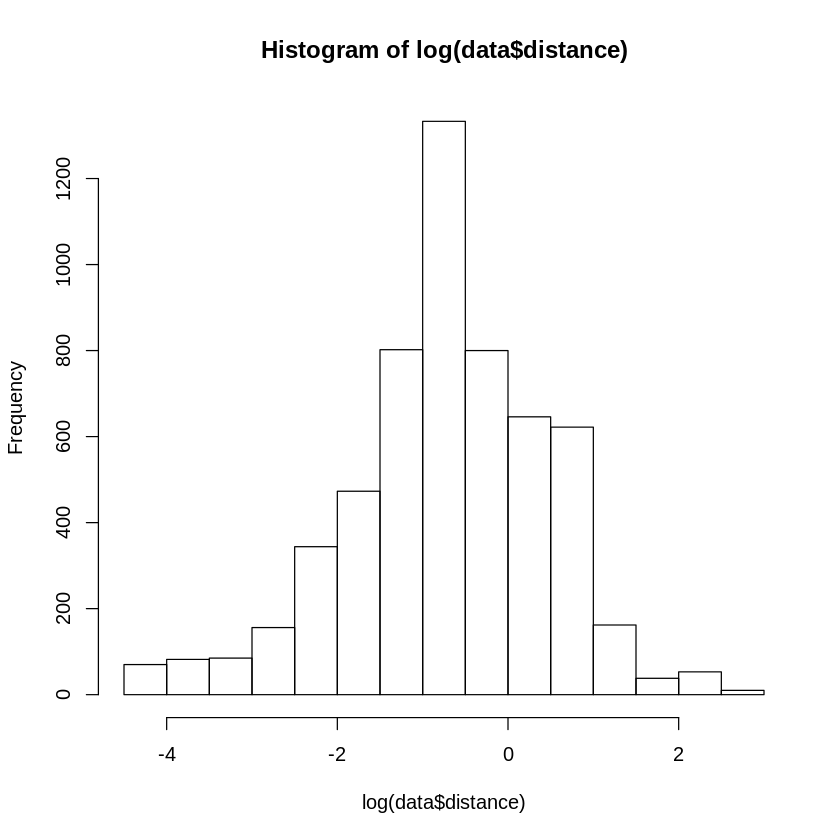

In [33]:
hist(log(data$distance))

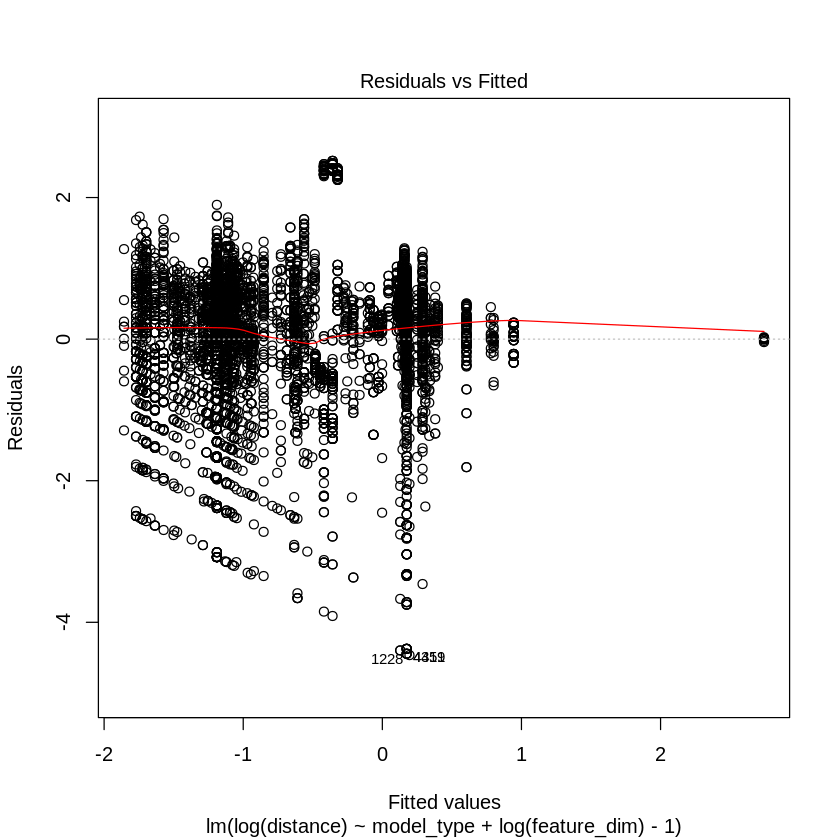

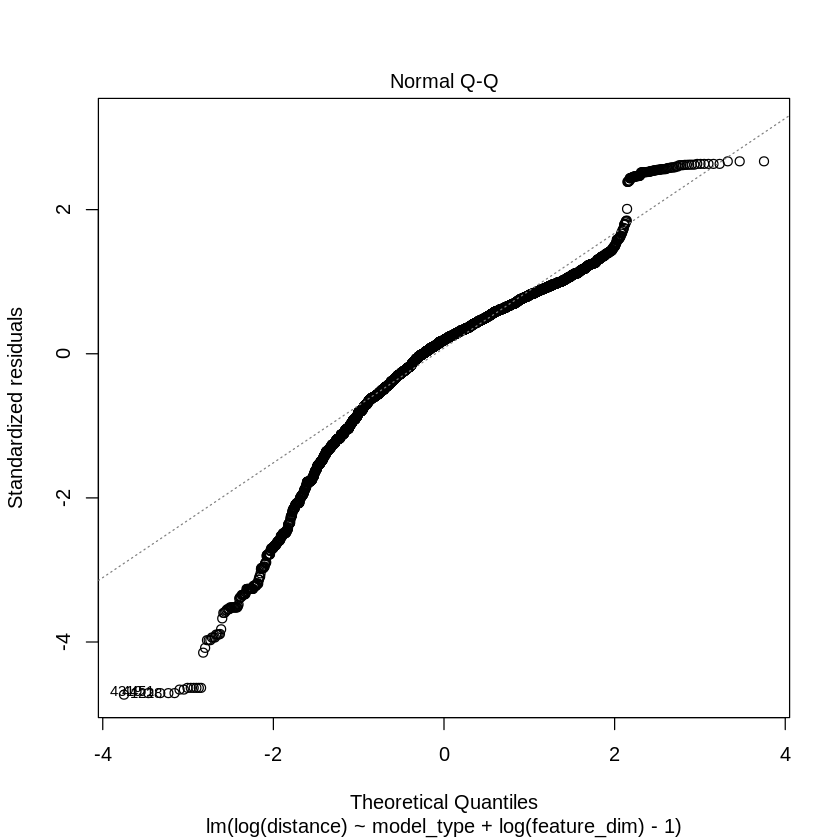

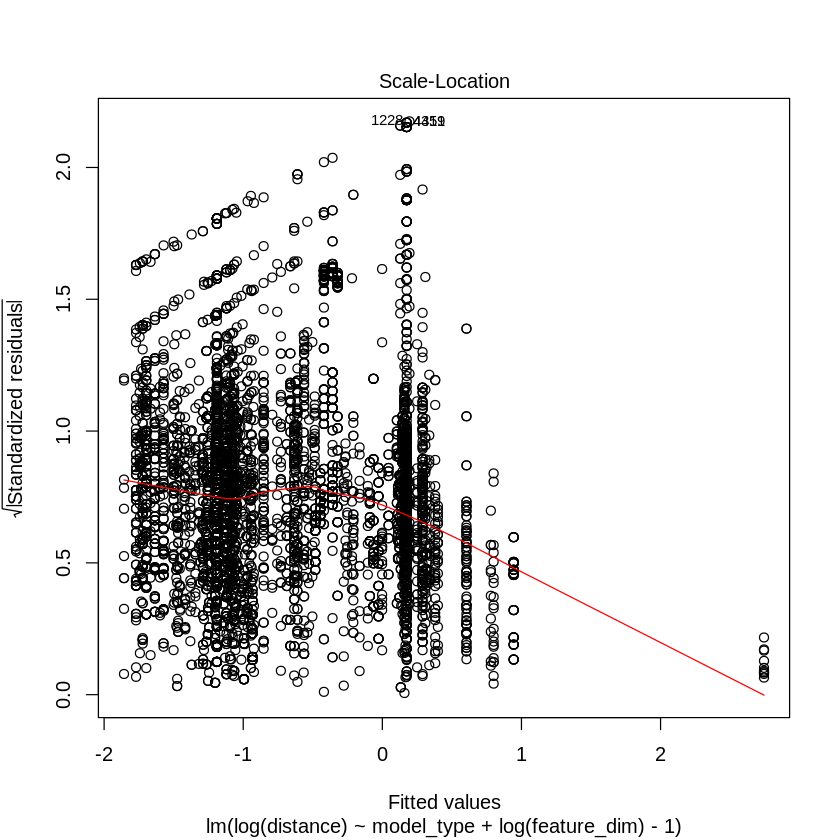

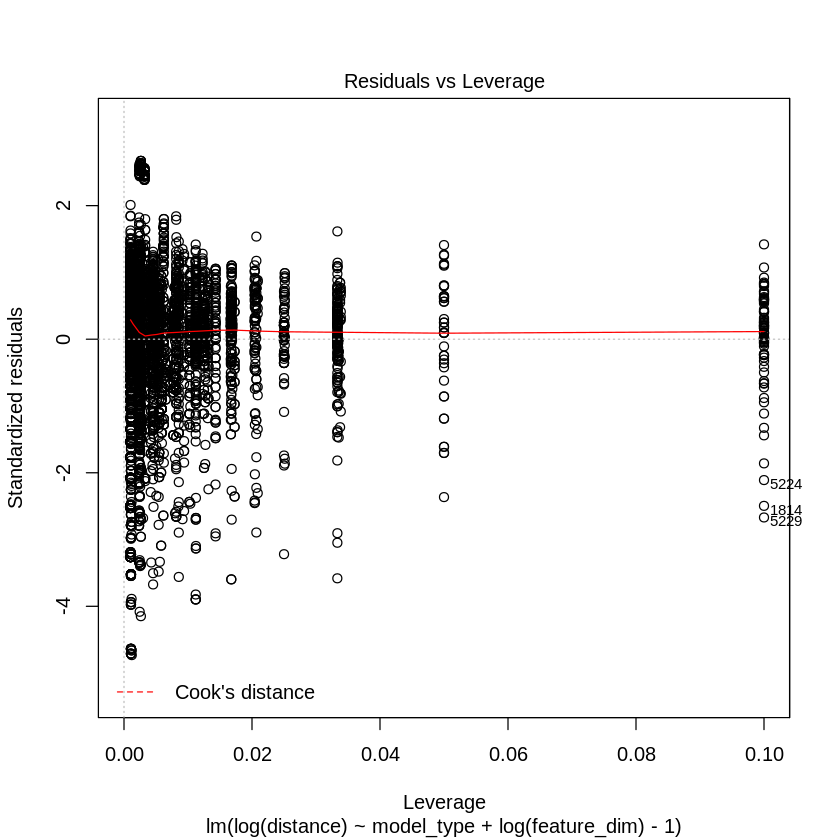

In [45]:
plot(model)

In [44]:
model <- lm( log(distance) ~ model_type + log(feature_dim) - 1,
             data = data, na.action = na.omit)
summary(model)



Call:
lm(formula = log(distance) ~ model_type + log(feature_dim) - 
    1, data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4637 -0.4300  0.1759  0.5815  2.5179 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
model_typeBeit                     -0.88031    0.23270  -3.783 0.000157 ***
model_typeByobNet                  -0.43789    0.22998  -1.904 0.056952 .  
model_typeCait                     -0.46209    0.19700  -2.346 0.019027 *  
model_typeCoaT                     -0.93724    0.21774  -4.304 1.70e-05 ***
model_typeConViT                   -0.82743    0.24854  -3.329 0.000876 ***
model_typeConvMixer                -0.65055    0.27042  -2.406 0.016174 *  
model_typeConvNeXt                  0.59299    0.22982   2.580 0.009897 ** 
model_typeCspNet                    1.01978    0.27486   3.710 0.000209 ***
model_typeDenseNet                  0.41196    0.24851   1.658 0.097434 .  
model_typeDLA        